## Breast cancer prediction model

We are creating the model, which will predict if a patient has a breast cancer or not, according to the different variables from dataset. 

Our dataset consists of such data as:
+ <b>id</b> of a patient
+ <b>radius</b> (mean of distances from center to points on the perimeter)
+ <b>smoothness</b> (local variation in radius lengths)
+ <b>fractal dimension</b>
+ <b>area</b>
+ <b>concavity</b> (severity of concave portions of the contour)
+ <b>texture</b> (standard deviation of gray-scale values)
+ <b>perimeter</b>
+ <b>compactness</b> (perimeter^2 / area - 1.0)
    
and others.

Each patient already has a diagnosis - either <b>M</b> - malignant, or <b>B</b> - benign. We will try to make as much accuracy in predictions of these diagnosis, as possible.   

#### First, making import of necessary libraries of Python:

In [ ]:
# Installing Tensorflow first
!pip install tensorflow

In [ ]:
# Check if tensorflow installed successfully
!pip show tensorflow

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder

#### Reading our medical dataset and showhing first 5 and last 5 rows (just printing a dataset variable name makes this operation by default)

In [3]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Data preprocessing

At first glance, this dataset seems quite informative. But if we look closer, it becomes obvious that columns <b>id</b> and <b>Unnamed 32</b> have no useful information for our future model. If we leave them "as is", they will influence the efficiency of our predictions. To understand better what exactly we should do with these columns, let's analyze them more deeply.

#### Let's look at the total number of columns and rows, just for information:

In [5]:
data.shape

(569, 33)

#### One of the problem of data preprocessing - gaps, or - null values. We can check if we have ones:

In [6]:
data.isnull().any().any()

True

We see, that there are some gaps in our data. It's easy to guess that the last column gives us these values. Moreover, it can consits **only** null values. To make sure, let's explore our data further.  
To show the information about ***max***, ***mix***, ***average*** and other descriptive statistics, we can use the function *.describe()*

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Now we see, that the last colums has only NaN. In that case the best options is just to get rid of it and check again. We will also delete id column, because it's useless for us:

In [26]:
df = data[data.columns[1:-1]]
df.isnull().any().any()

False

In [27]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Train and test data

#### Now, when we made our dataset suitable to work with, we will make a train and test data:

Our training set will be the data which include only parameters of each patient, without column of diagnosis, and testing set - is excatly the diagnosis column. First, we divide them from each other:

In [131]:
x = df[df.columns[1::]]
y = df[df.columns[:1]]

In [132]:
x.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

(None, None)

**Now we will take some % of y and x data, and give one part to our model for teaching and understanding the content and correlation of our parameters. After that we will check how it learned using the remaining part of data.   
To do this, we will use <u>*Scikit-learn library*.</u> Let's take, for example, 25%.**

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [142]:
x_train.shape

(426, 30)

In [155]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

#### Our model will have 3 layers: input layers, hidden layer and output layer. We aslo need to choose the number of neurons for our model, and to define its input shape - due to this, our model will have weights.

In [248]:
# We define the number of inputs as a number of rows of x_train:
inputs = x_train.shape[1:]

# Creating a model
ai_model = keras.Sequential()

# Adding layers to the model, for example let's try 32 neurons
ai_model.add(keras.layers.Dense(32, input_shape = inputs, activation = 'relu', name="layer_1"))
ai_model.add(keras.layers.Dense(32, activation = 'relu', name="layer_2"))
ai_model.add(keras.layers.Dense(1, activation = 'relu', name="layer_3"))

In [144]:
# Let's see the detailes of the created model
ai_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 32)                992       
                                                                 
 layer_2 (Dense)             (None, 32)                1056      
                                                                 
 layer_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [249]:
ai_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [250]:
ai_model.fit(x_train, y_train.ravel(), epochs=300)

Epoch 1/300
14/14 [==============================] - 1s 11ms/step - loss: 9.3070 - binary_accuracy: 0.3897 - val_loss: 10.3439 - val_binary_accuracy: 0.3217
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 9.3070 - binary_accuracy: 0.3897 - val_loss: 10.3439 - val_binary_accuracy: 0.3217
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 9.3070 - binary_accuracy: 0.3897 - val_loss: 10.3439 - val_binary_accuracy: 0.3217
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 9.3070 - binary_accuracy: 0.3897 - val_loss: 10.3439 - val_binary_accuracy: 0.3217
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 9.3070 - binary_accuracy: 0.3897 - val_loss: 10.3439 - val_binary_accuracy: 0.3217
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 9.3070 - binary_accuracy: 0.3897 - val_loss: 10.3439 - val_binary_accuracy: 0.3217
Epoch 7/300
14/14 [==============================] - 0s 3ms/ste

#### We see that accuracy of our model is not very good. Let's try it with our test data and visualize some plot:

In [251]:
ai_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 10.3439 - binary_accuracy: 0.3217


[10.343890190124512, 0.3216783106327057]

5/5 [==============================] - 0s 751us/step


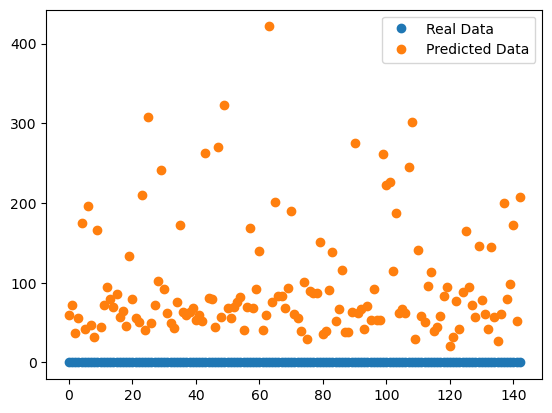

In [254]:
# Get the predicted values for the test data
y_pred = ai_model.predict(x_test)

# Plot the real data and predicted values
plt.plot(y_test, 'o', label="Real Data")
plt.plot(y_pred, 'o', label="Predicted Data")
plt.legend()
plt.show()

# Improving the model

Let's try different approaches to improve our model and see what happens.  

**First, let's try to change to number of neurons:**

In [208]:
inputs = x_train.shape[1:]

ai_model = keras.Sequential()

ai_model.add(keras.layers.Dense(256, input_shape = inputs, activation = 'relu', name="layer_1"))
ai_model.add(keras.layers.Dense(256, activation = 'relu', name="layer_2"))
ai_model.add(keras.layers.Dense(1, activation = 'relu', name="layer_3"))

In [209]:
ai_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [213]:
ai_model.fit(x_train, y_train.ravel(), epochs=300)

Epoch 1/300
14/14 [==============================] - 0s 2ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 3/300
14/14 [==============================] - 0s 1ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 4/300
14/14 [==============================] - 0s 1ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 5/300
14/14 [==============================] - 0s 1ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 6/300
14/14 [==============================] - 0s 2ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 7/300
14/14 [==============================] - 0s 1ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 9/300
14/14 [==============================] - 0s 1ms/step - loss: 9.3070 - binary_accuracy: 0.3897
Epoch 10/300
14/14 [==========================

#### Let's try to use different activation function. For example, sigmoid - this function normalizes our data to the values from 0 to 1, just like a sigmoid function plot:

In [255]:
inputs = x_train.shape[1:]

ai_model = keras.Sequential()

ai_model.add(keras.layers.Dense(32, input_shape = inputs, activation = 'sigmoid', name="layer_1"))
ai_model.add(keras.layers.Dense(32, activation = 'sigmoid', name="layer_2"))
ai_model.add(keras.layers.Dense(1, activation = 'sigmoid', name="layer_3"))

In [256]:
ai_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [257]:
ai_model.fit(x_train, y_train.ravel(), epochs=300)

Epoch 1/300
14/14 [==============================] - 1s 1ms/step - loss: 0.6749 - binary_accuracy: 0.6103
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 0.6532 - binary_accuracy: 0.6103
Epoch 3/300
14/14 [==============================] - 0s 1ms/step - loss: 0.6363 - binary_accuracy: 0.6103
Epoch 4/300
14/14 [==============================] - 0s 1ms/step - loss: 0.6246 - binary_accuracy: 0.6103
Epoch 5/300
14/14 [==============================] - 0s 1ms/step - loss: 0.6023 - binary_accuracy: 0.6103
Epoch 6/300
14/14 [==============================] - 0s 1ms/step - loss: 0.5664 - binary_accuracy: 0.6103
Epoch 7/300
14/14 [==============================] - 0s 1ms/step - loss: 0.5506 - binary_accuracy: 0.6103
Epoch 8/300
14/14 [==============================] - 0s 1ms/step - loss: 0.5295 - binary_accuracy: 0.8732
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5229 - binary_accuracy: 0.8192
Epoch 10/300
14/14 [==========================

In [258]:
ai_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1588 - binary_accuracy: 0.9301


[0.15880471467971802, 0.9300699234008789]

5/5 [==============================] - 0s 1ms/step


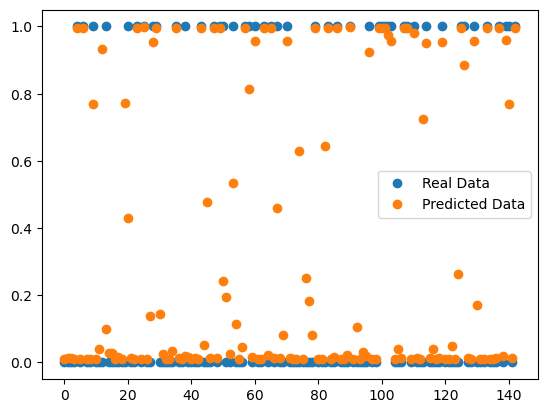

In [259]:
# Get the predicted values for the test data
y_pred = ai_model.predict(x_test)

# Plot the real data and predicted values
plt.plot(y_test, 'o', label="Real Data")
plt.plot(y_pred, 'o', label="Predicted Data")
plt.legend()
plt.show()

# Now we see that accuracy is pretty good. It means that it is very important to choose the correct options and parameters according to the purposes of your model during the building phase.